In [72]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline



In [73]:
data1 = pd.read_csv('Bitcoin_US.csv')
data2 = pd.read_csv('BitcoinData1.csv')
data3 = pd.read_csv("Bitcoinprices.txt")
data4 = pd.read_csv("Bitcoinsentiments.txt")

In [74]:
data1.head()
data1['Date']= pd.to_datetime(data1['Date']).apply(lambda x:x.strftime('%Y%m%d'))
data1.index = data1['Date']
del data1['Date']
data1.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
20140107,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
20140108,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
20140109,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
20140110,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
20140111,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 20140107 to 20171017
Data columns (total 7 columns):
Open                 1380 non-null float64
High                 1380 non-null float64
Low                  1380 non-null float64
Close                1380 non-null float64
Volume (BTC)         1380 non-null float64
Volume (Currency)    1380 non-null float64
Weighted Price       1380 non-null float64
dtypes: float64(7)
memory usage: 86.2+ KB


In [76]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
stamp        642 non-null int64
sentiment    642 non-null float64
dtypes: float64(1), int64(1)
memory usage: 10.1 KB


In [77]:
data4.index = data4['stamp']
del data4['stamp']
data4.head()

,sentiment
stamp,
20171114,0.380219
20171113,0.380219
20171112,0.380219
20171111,0.380219
20171110,0.380219


In [78]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 20171114 to 20160211
Data columns (total 1 columns):
sentiment    642 non-null float64
dtypes: float64(1)
memory usage: 10.0 KB


In [79]:
data5 =  pd.concat([data1.reset_index(drop=True), data4.reset_index(drop=True)], axis=1)

In [80]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 8 columns):
Open                 1380 non-null float64
High                 1380 non-null float64
Low                  1380 non-null float64
Close                1380 non-null float64
Volume (BTC)         1380 non-null float64
Volume (Currency)    1380 non-null float64
Weighted Price       1380 non-null float64
sentiment            642 non-null float64
dtypes: float64(8)
memory usage: 86.3 KB


In [81]:
data5.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219


In [82]:
data5.isnull().sum()
data_5 = data5.dropna(how='any')

In [83]:
data_5.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
sentiment            0
dtype: int64

In [84]:
data_5.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219


In [85]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Data columns (total 8 columns):
Open                 642 non-null float64
High                 642 non-null float64
Low                  642 non-null float64
Close                642 non-null float64
Volume (BTC)         642 non-null float64
Volume (Currency)    642 non-null float64
Weighted Price       642 non-null float64
sentiment            642 non-null float64
dtypes: float64(8)
memory usage: 45.1 KB


In [86]:
data2.head()
data2['time']= pd.to_datetime(data2['time']).apply(lambda x:x.strftime('%Y%m%d'))
data2.index = data2['time']
del data2['time']
data2.head()

,XEM,IOT,amd,nvda,mc_iota,mc_nem,gg_crypto,gg_nem_p,gg_iota_p,gg_bitcoin_p,gg_nem_w,gg_iota_w,gg_gpu,rd_CrypCurr_g,rd_nem_g,rd_Iota_g
time,,,,,,,,,,,,,,,,
20170828,0.286,0.8620,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.286,0.8700,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.286,0.8699,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.286,0.8800,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.287,0.8739,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352


In [87]:
data =  pd.concat([data5.reset_index(drop=True), data2.reset_index(drop=True)], axis=1)

In [88]:
data.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment,XEM,IOT,...,gg_crypto,gg_nem_p,gg_iota_p,gg_bitcoin_p,gg_nem_w,gg_iota_w,gg_gpu,rd_CrypCurr_g,rd_nem_g,rd_Iota_g
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219,0.286,0.8620,...,42,73,50,28,45,34,64,1221,57,352
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219,0.286,0.8700,...,42,73,50,28,45,34,64,1221,57,352
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219,0.286,0.8699,...,42,73,50,28,45,34,64,1221,57,352
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219,0.286,0.8800,...,42,73,50,28,45,34,64,1221,57,352
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219,0.287,0.8739,...,42,73,50,28,45,34,64,1221,57,352


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 24 columns):
Open                 1380 non-null float64
High                 1380 non-null float64
Low                  1380 non-null float64
Close                1380 non-null float64
Volume (BTC)         1380 non-null float64
Volume (Currency)    1380 non-null float64
Weighted Price       1380 non-null float64
sentiment            642 non-null float64
XEM                  1934 non-null float64
IOT                  1934 non-null float64
amd                  1934 non-null float64
nvda                 1934 non-null float64
mc_iota              1934 non-null float64
mc_nem               1934 non-null float64
gg_crypto            1934 non-null int64
gg_nem_p             1934 non-null int64
gg_iota_p            1934 non-null int64
gg_bitcoin_p         1934 non-null int64
gg_nem_w             1934 non-null int64
gg_iota_w            1934 non-null int64
gg_gpu               1934 non-null int64
rd_Cr

In [90]:
data.isnull().sum()
data= data.dropna(how='any')

In [91]:
data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
sentiment            0
XEM                  0
IOT                  0
amd                  0
nvda                 0
mc_iota              0
mc_nem               0
gg_crypto            0
gg_nem_p             0
gg_iota_p            0
gg_bitcoin_p         0
gg_nem_w             0
gg_iota_w            0
gg_gpu               0
rd_CrypCurr_g        0
rd_nem_g             0
rd_Iota_g            0
dtype: int64

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Data columns (total 24 columns):
Open                 642 non-null float64
High                 642 non-null float64
Low                  642 non-null float64
Close                642 non-null float64
Volume (BTC)         642 non-null float64
Volume (Currency)    642 non-null float64
Weighted Price       642 non-null float64
sentiment            642 non-null float64
XEM                  642 non-null float64
IOT                  642 non-null float64
amd                  642 non-null float64
nvda                 642 non-null float64
mc_iota              642 non-null float64
mc_nem               642 non-null float64
gg_crypto            642 non-null int64
gg_nem_p             642 non-null int64
gg_iota_p            642 non-null int64
gg_bitcoin_p         642 non-null int64
gg_nem_w             642 non-null int64
gg_iota_w            642 non-null int64
gg_gpu               642 non-null int64
rd_CrypCurr_g        642 no

In [93]:
# Fill value 0 data points on Weighted Price with NAN and then use ffill method to fill values
data['Weighted Price'].replace(0, np.nan, inplace=True)
data['Weighted Price'].fillna(method='ffill', inplace=True)

In [94]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

In [95]:
# Using Weighted Price as a feature to train the LSTM model
# Use MinMaxScaler to normalize Weighted Price to range from 0 to 1

from sklearn.preprocessing import MinMaxScaler
values = data['Weighted Price'].values.reshape(-1,1)
values = values.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [96]:
#Split 70% of data for training and 30% for testing
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

449 193


In [97]:
# Function to create lookback

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [98]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

448
192


In [99]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [100]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)


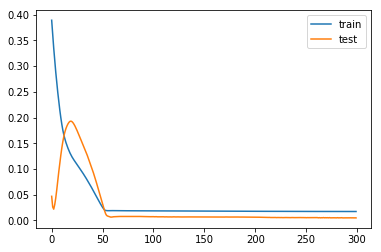

In [101]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

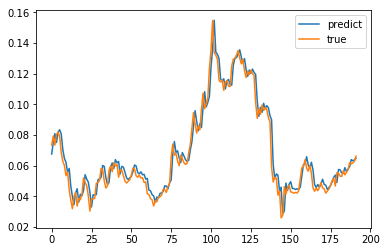

In [102]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [103]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [104]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.653


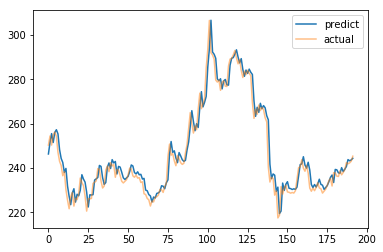

In [105]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [106]:
predictDates = data.tail(len(testX)).index

In [107]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [108]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

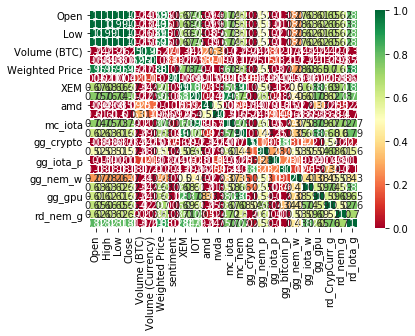

In [109]:
# Using additional features for model training
# Find corrleration in features to Weighted Price
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [110]:
#Observation: Volume is corrlerated to Weighted Price. Open, High, Low, Close are directly related to Weighted Price
#Function to convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [111]:
# Get Weighted Price with Volume(BTC), Volume(Currency)
data.reset_index(drop=True)
values = data[['Weighted Price'] + ['Volume (BTC)'] + ['Volume (Currency)']].values
values = values.astype('float64')

data.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment,XEM,IOT,...,gg_crypto,gg_nem_p,gg_iota_p,gg_bitcoin_p,gg_nem_w,gg_iota_w,gg_gpu,rd_CrypCurr_g,rd_nem_g,rd_Iota_g
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219,0.286,0.8620,...,42,73,50,28,45,34,64,1221,57,352
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219,0.286,0.8700,...,42,73,50,28,45,34,64,1221,57,352
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219,0.286,0.8699,...,42,73,50,28,45,34,64,1221,57,352
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219,0.286,0.8800,...,42,73,50,28,45,34,64,1221,57,352
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219,0.287,0.8739,...,42,73,50,28,45,34,64,1221,57,352


In [112]:
# Normalize features to range from 0 to 1

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [113]:
# Frame as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
1,0.929330,0.022867,0.080092,0.925453,0.028078,0.098032
2,0.925453,0.028078,0.098032,0.914479,0.011941,0.041316
3,0.914479,0.011941,0.041316,0.933820,0.011746,0.041291
4,0.933820,0.011746,0.041291,1.000000,0.027442,0.101694
5,1.000000,0.027442,0.101694,0.956274,0.037221,0.133254


In [114]:
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.929330   0.022867   0.080092  0.925453
2   0.925453   0.028078   0.098032  0.914479
3   0.914479   0.011941   0.041316  0.933820
4   0.933820   0.011746   0.041291  1.000000
5   1.000000   0.027442   0.101694  0.956274


In [115]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(448, 1, 3) (448,) (193, 1, 3) (193,)


In [116]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

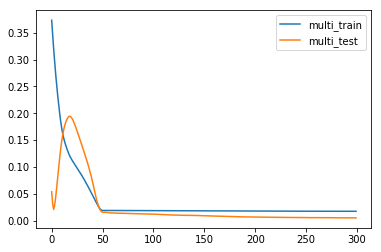

In [117]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

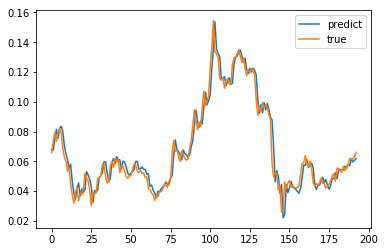

In [118]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [119]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [120]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.743


In [121]:
# Plot line graph with actual price, predicted price with feature Weighted Price,
# predicted price with features Volume and Weighted Price

actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, multi_predict_chart, actual_chart])

In [132]:
# Get Weighted Price with Volume(BTC), Volume(Currency), important features 'IOT','sentiment','gg_gpu'
data.reset_index(drop=True)
#values = data[['Weighted Price'] + ['IOT'] + ['sentiment'] + ['gg_gpu']].values
values = data[['Weighted Price'] + ['Volume (BTC)'] + ['Volume (Currency)'] + ['IOT'] + ['sentiment'] + ['gg_gpu']].values

values = values.astype('float64')

data.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment,XEM,IOT,...,gg_crypto,gg_nem_p,gg_iota_p,gg_bitcoin_p,gg_nem_w,gg_iota_w,gg_gpu,rd_CrypCurr_g,rd_nem_g,rd_Iota_g
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219,0.286,0.8620,...,42,73,50,28,45,34,64,1221,57,352
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219,0.286,0.8700,...,42,73,50,28,45,34,64,1221,57,352
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219,0.286,0.8699,...,42,73,50,28,45,34,64,1221,57,352
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219,0.286,0.8800,...,42,73,50,28,45,34,64,1221,57,352
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219,0.287,0.8739,...,42,73,50,28,45,34,64,1221,57,352


In [133]:
# Normalize features to range from 0 to 1

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [134]:
# Frame as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.929330,0.022867,0.080092,0.925534,0.752559,0.509804,0.925453,0.028078,0.098032,0.941211,0.752559,0.509804
2,0.925453,0.028078,0.098032,0.941211,0.752559,0.509804,0.914479,0.011941,0.041316,0.941015,0.752559,0.509804
3,0.914479,0.011941,0.041316,0.941015,0.752559,0.509804,0.933820,0.011746,0.041291,0.960807,0.752559,0.509804
4,0.933820,0.011746,0.041291,0.960807,0.752559,0.509804,1.000000,0.027442,0.101694,0.948854,0.752559,0.509804
5,1.000000,0.027442,0.101694,0.948854,0.752559,0.509804,0.956274,0.037221,0.133254,0.931413,0.752559,0.509804


In [135]:
reframed.drop(reframed.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
1   0.929330   0.022867   0.080092   0.925534   0.752559   0.509804  0.925453
2   0.925453   0.028078   0.098032   0.941211   0.752559   0.509804  0.914479
3   0.914479   0.011941   0.041316   0.941015   0.752559   0.509804  0.933820
4   0.933820   0.011746   0.041291   0.960807   0.752559   0.509804  1.000000
5   1.000000   0.027442   0.101694   0.948854   0.752559   0.509804  0.956274


In [136]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(448, 1, 6) (448,) (193, 1, 6) (193,)


In [137]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

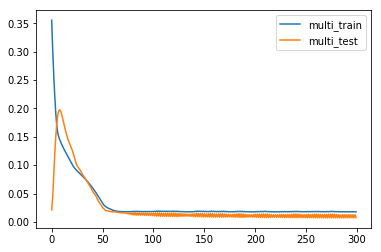

In [138]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

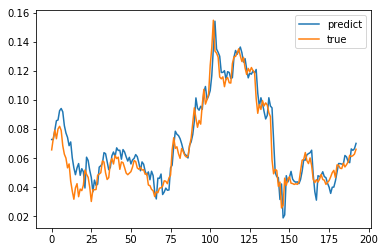

In [139]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [140]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [141]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.624


Lookback = 1
LSTM with single feature of Weighted Price have RMSE of 4.653
LSTM with features of Volume(BTC), Volume(Currency) and Weighted Price have RMSE of 4.743
LSTM with features of Volume(BTC), Volume(Currency), sentiment, IOT, gg_gpu and Weighted Price have RMSE of 6.624